# Part II - PISA 2012 
## by Aldair Mendoza

## Investigation Overview

The main features of interest are student score performance on math, reading, and science. Essentially finding what variables affect the overall score of students and their performance at school.

**First: When the parent education level is the highest. It is clear that the better is the score of a student.**

**Second: When both parents are present, it is clear that the score is better rather than single parenthood.**


## Dataset Overview

PISA 2012 is an study developed by the OECD, the data contains the skills of 15-year-old school students around the world. The study mainly assesses students’ mathematics, science, and reading skills. The data also contains information on students’ background and their schools.This dataset, PISA 2012, has relevant data on 485,490 students around the world.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
students_performance_cleaned = pd.read_csv('PISA_2012_cleaned.csv')

In [3]:
# Ordering the parent education levels 
parent_education_dtype = pd.api.types.CategoricalDtype(categories=['None','ISCED 1','ISCED 2','ISCED 3B, C','ISCED 3A, ISCED 4','ISCED 5B','ISCED 5A, 6'], ordered=True)
students_performance_cleaned.loc[:,'highest_education_parents'] = students_performance_cleaned['highest_education_parents'].astype(parent_education_dtype)
parent_and_scores = students_performance_cleaned.groupby(['highest_education_parents']).mean().reset_index()[['highest_education_parents','overall_score','math_score','reading_score','science_score']]
parent_and_scores = students_performance_cleaned[['highest_education_parents','overall_score','math_score','reading_score','science_score']]
parent_and_scores.sort_values(by='overall_score')
parent_and_scores = parent_and_scores.copy()
parent_and_scores.rename({'overall_score':'Overall Score', 'math_score':'Math Score', 'reading_score':'Reading Score', 'science_score':'Science Score'},axis=1, inplace=True)

data = pd.melt(parent_and_scores, id_vars=['highest_education_parents'], value_vars=['Overall Score','Math Score','Reading Score','Science Score'])

## What are the top 10 countries with the best student overall scores? 

**The top 10 countries with the best score are China-Shanghai, Singapore, Hong Kong-China, Chinese Taipei, Korea, Japan, Chinese Taipei, Liechtenstein, Estonia, Poland, Macao China.**

**China-Shanghai has the best score on the three subjects.**

In [4]:
country_scores = students_performance_cleaned.groupby(['country'])[['overall_score','math_score','reading_score','science_score']].mean()

Text(0.5, 1.0, 'Countries by Student Score')

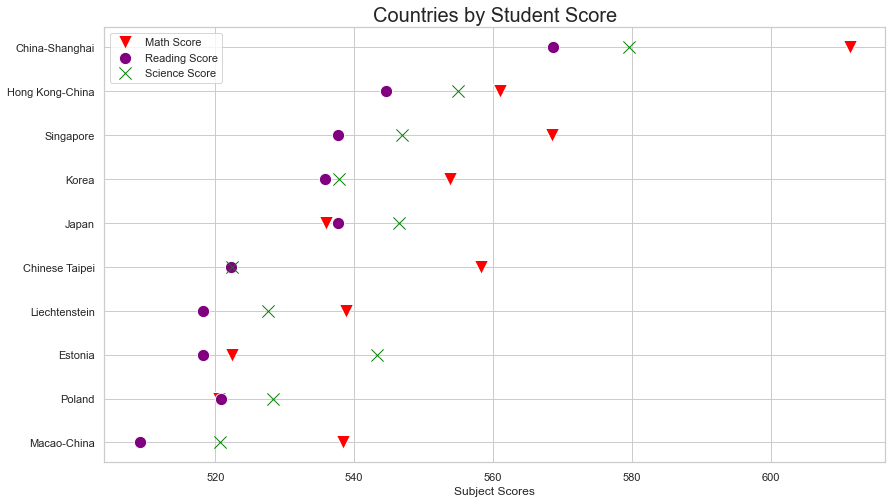

In [5]:
plt.figure(figsize=[14,8])
sns.set(style='whitegrid')
sns.scatterplot(x = 'math_score', y = 'country', data=country_scores.nlargest(10, 'overall_score'), label='Math Score', color = 'red', marker = 'v', s = 200)
sns.scatterplot(x = 'reading_score', y = 'country', data=country_scores.nlargest(10, 'overall_score'), label='Reading Score', color = 'purple', marker = 'o', s = 150)
sns.scatterplot(x = 'science_score', y = 'country', data=country_scores.nlargest(10, 'overall_score'), label='Science Score', color = 'green', marker = 'x', s = 150)
plt.legend()
plt.xlabel('Subject Scores')
plt.ylabel('')
plt.title('Countries by Student Score', size=20)

## Does parent education level affect the overall score of students? 


**When the parent education level is the highest. It is clear that the better is the score of a student.**

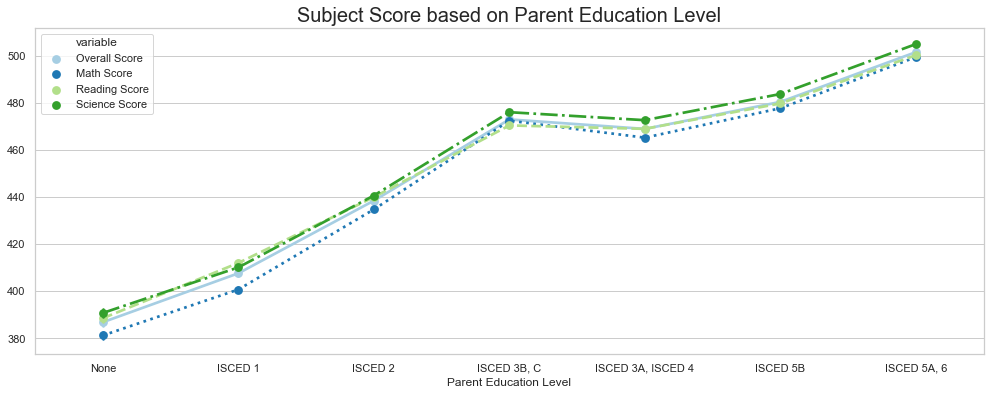

In [6]:
fig, ax = plt.subplots(1, 1, figsize=(17, 6))
sns.pointplot(ax=ax, data = data, x = 'highest_education_parents', y='value', hue='variable', linestyles=["-", ":", "--", "-."], palette=sns.color_palette('Paired'))
plt.xlabel('Parent Education Level')
plt.ylabel('')
plt.title("Subject Score based on Parent Education Level", size=20);

## Can the parenthood impact the overall score of students? 

**There is no significant correlation between hours of with parents and overall score. However, then there is a positive impact on overall score when both parents are present rather than single parent.**

Text(0.5, 1.0, 'Overall Score based on Hours of Study and Parenthood Type')

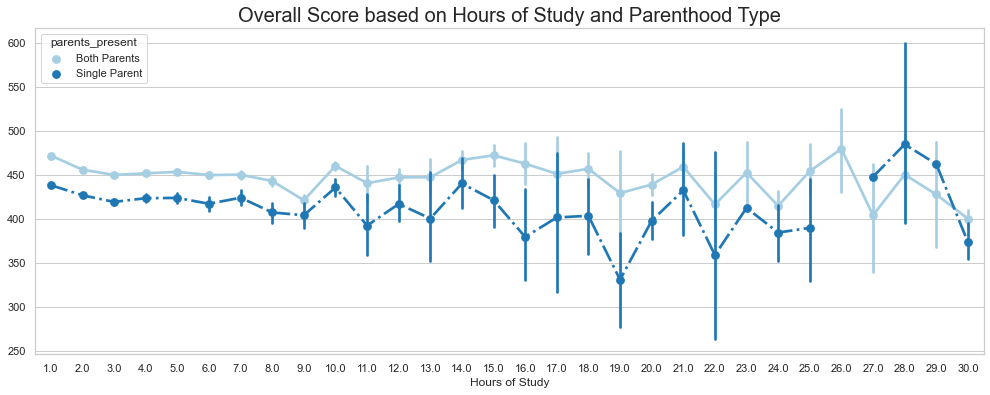

In [7]:
plt.figure(figsize = [17, 6])
sns.pointplot(data = students_performance_cleaned[students_performance_cleaned['study_with_parent'] != 0], x = 'study_with_parent', y = 'overall_score', hue = 'parents_present', linestyles=["-", "-."], palette=sns.color_palette('Paired'))
plt.xlabel('Hours of Study')
plt.ylabel('')
plt.title('Overall Score based on Hours of Study and Parenthood Type', size=20)

## Do parenthood influence on overall score? 

**Yes. When both parents are present, it is clear that the score is better rather than single parenthood.**

Text(0.5, 1.0, 'Overall Score based on Parent Education Level and Parenthood')

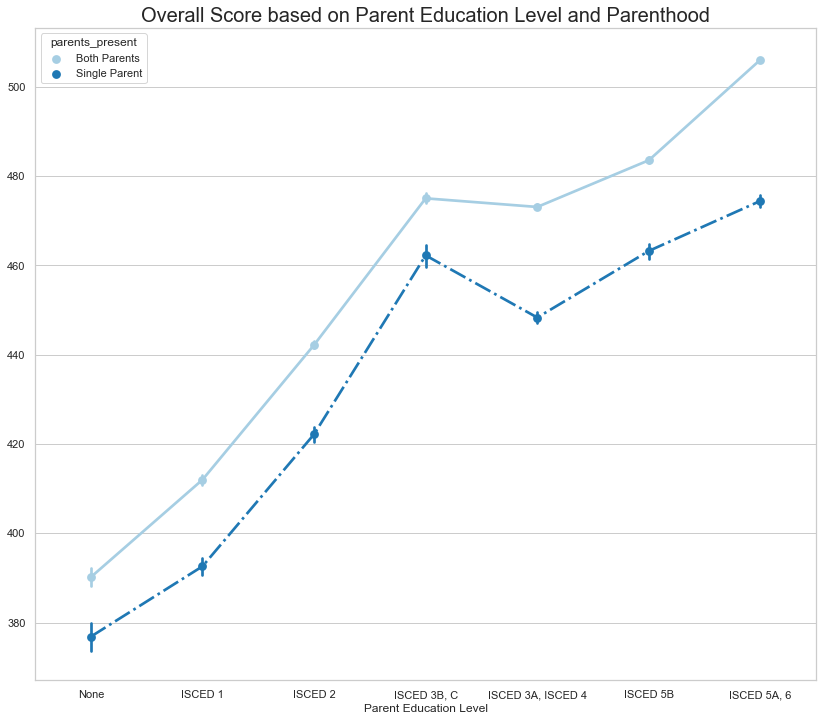

In [8]:
plt.figure(figsize = [14, 12])
sns.pointplot(data = students_performance_cleaned, x = 'highest_education_parents', y='overall_score', hue='parents_present', linestyles=["-", "-."], palette=sns.color_palette('Paired'))
plt.xlabel('Parent Education Level')
plt.ylabel('')
plt.title('Overall Score based on Parent Education Level and Parenthood', size=20)

In [ ]:
!jupyter nbconvert Part_II_slide_deck.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Part_II_slide_deck.ipynb to slides
[NbConvertApp] Writing 848397 bytes to Part_II_slide_deck.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/Part_II_slide_deck.slides.html
Use Control-C to stop this server
